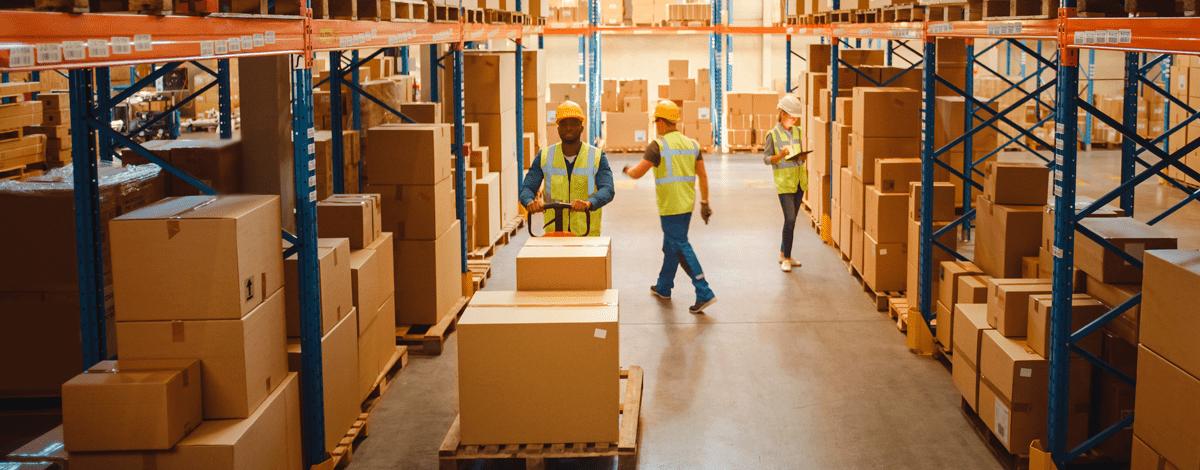

# Sistema de Gerenciamento de Inventário para uma Loja Virtual

_Documentação do projeto final do módulo de Lógica de Programação II da trilha de Data Science do Santander Coders 2024.2, ministrado por Jonas Soares. O projeto foi elaborado por Filipe Sousa, Gabriel Marques, Maria Paula Andrade, Matheus Chaves e Mille Amorim._

> 1. [Objetivo](#objetivo)
> 2. [Arquitetura do sistema](#arquitetura)
> 3. [Funcionalidades do sistema](#funcionalidades) <br>
>    3.1 [Interface com o usuário](#interface) <br>
>    3.2 [Documentação técnica das funções](#documentacaotecnica) <br>
>    3.3 [Classificação das funções](#classificacao) <br>
>    3.4 [Decisões de design](#decisoes) <br>
>    3.5 [Tecnologias utilizadas](#tecnologias) <br>
> 4. [Manual de Uso do Sistema](#manualdeuso) <br>
>    4.1 [Loja Virrual](#lojavirtual) <br>
>    4.2 [Implementação do sistema](#implementacao) <br>
>    4.3 [Etapas de implementação](#etapas) <br>
> 5. [Próximos Passos](#proximospassos)

## Objetivo <a id='objetivo'></a>

O principal objetivo deste projeto é desenvolver uma solução de gerenciamento de inventário de produtos para uma loja virtual que:
* Permita o cadastro, atualização, exclusão e listagem de produtos.
* Contemple a variedade de produtos vendidos pela loja que variam em categorias, preços e quantidade disponíveis.
* Permita o gerenciamento de produtos, facilitar operações de vendas, armazenamento de dados e geração de relatórios detalhados em CSV.
* Seja robusto (escalável), eficiente (legível e menos custoso computacionalmente) e capaz de lidar com erros de forma elegante.
* Ofereça menus e opções que guiem usuário durante o uso do sistema de forma flexível e permitindo a customização das funcionalidades.
* Ofereça um feedback claro ao usuário em caso de erros e garanta que o sistema continue funcionando corretamente.
* Interaja com o usuário de forma amigável, clara e responsiva.

## Arquitetura do sistema <a id='arquitetura'></a>

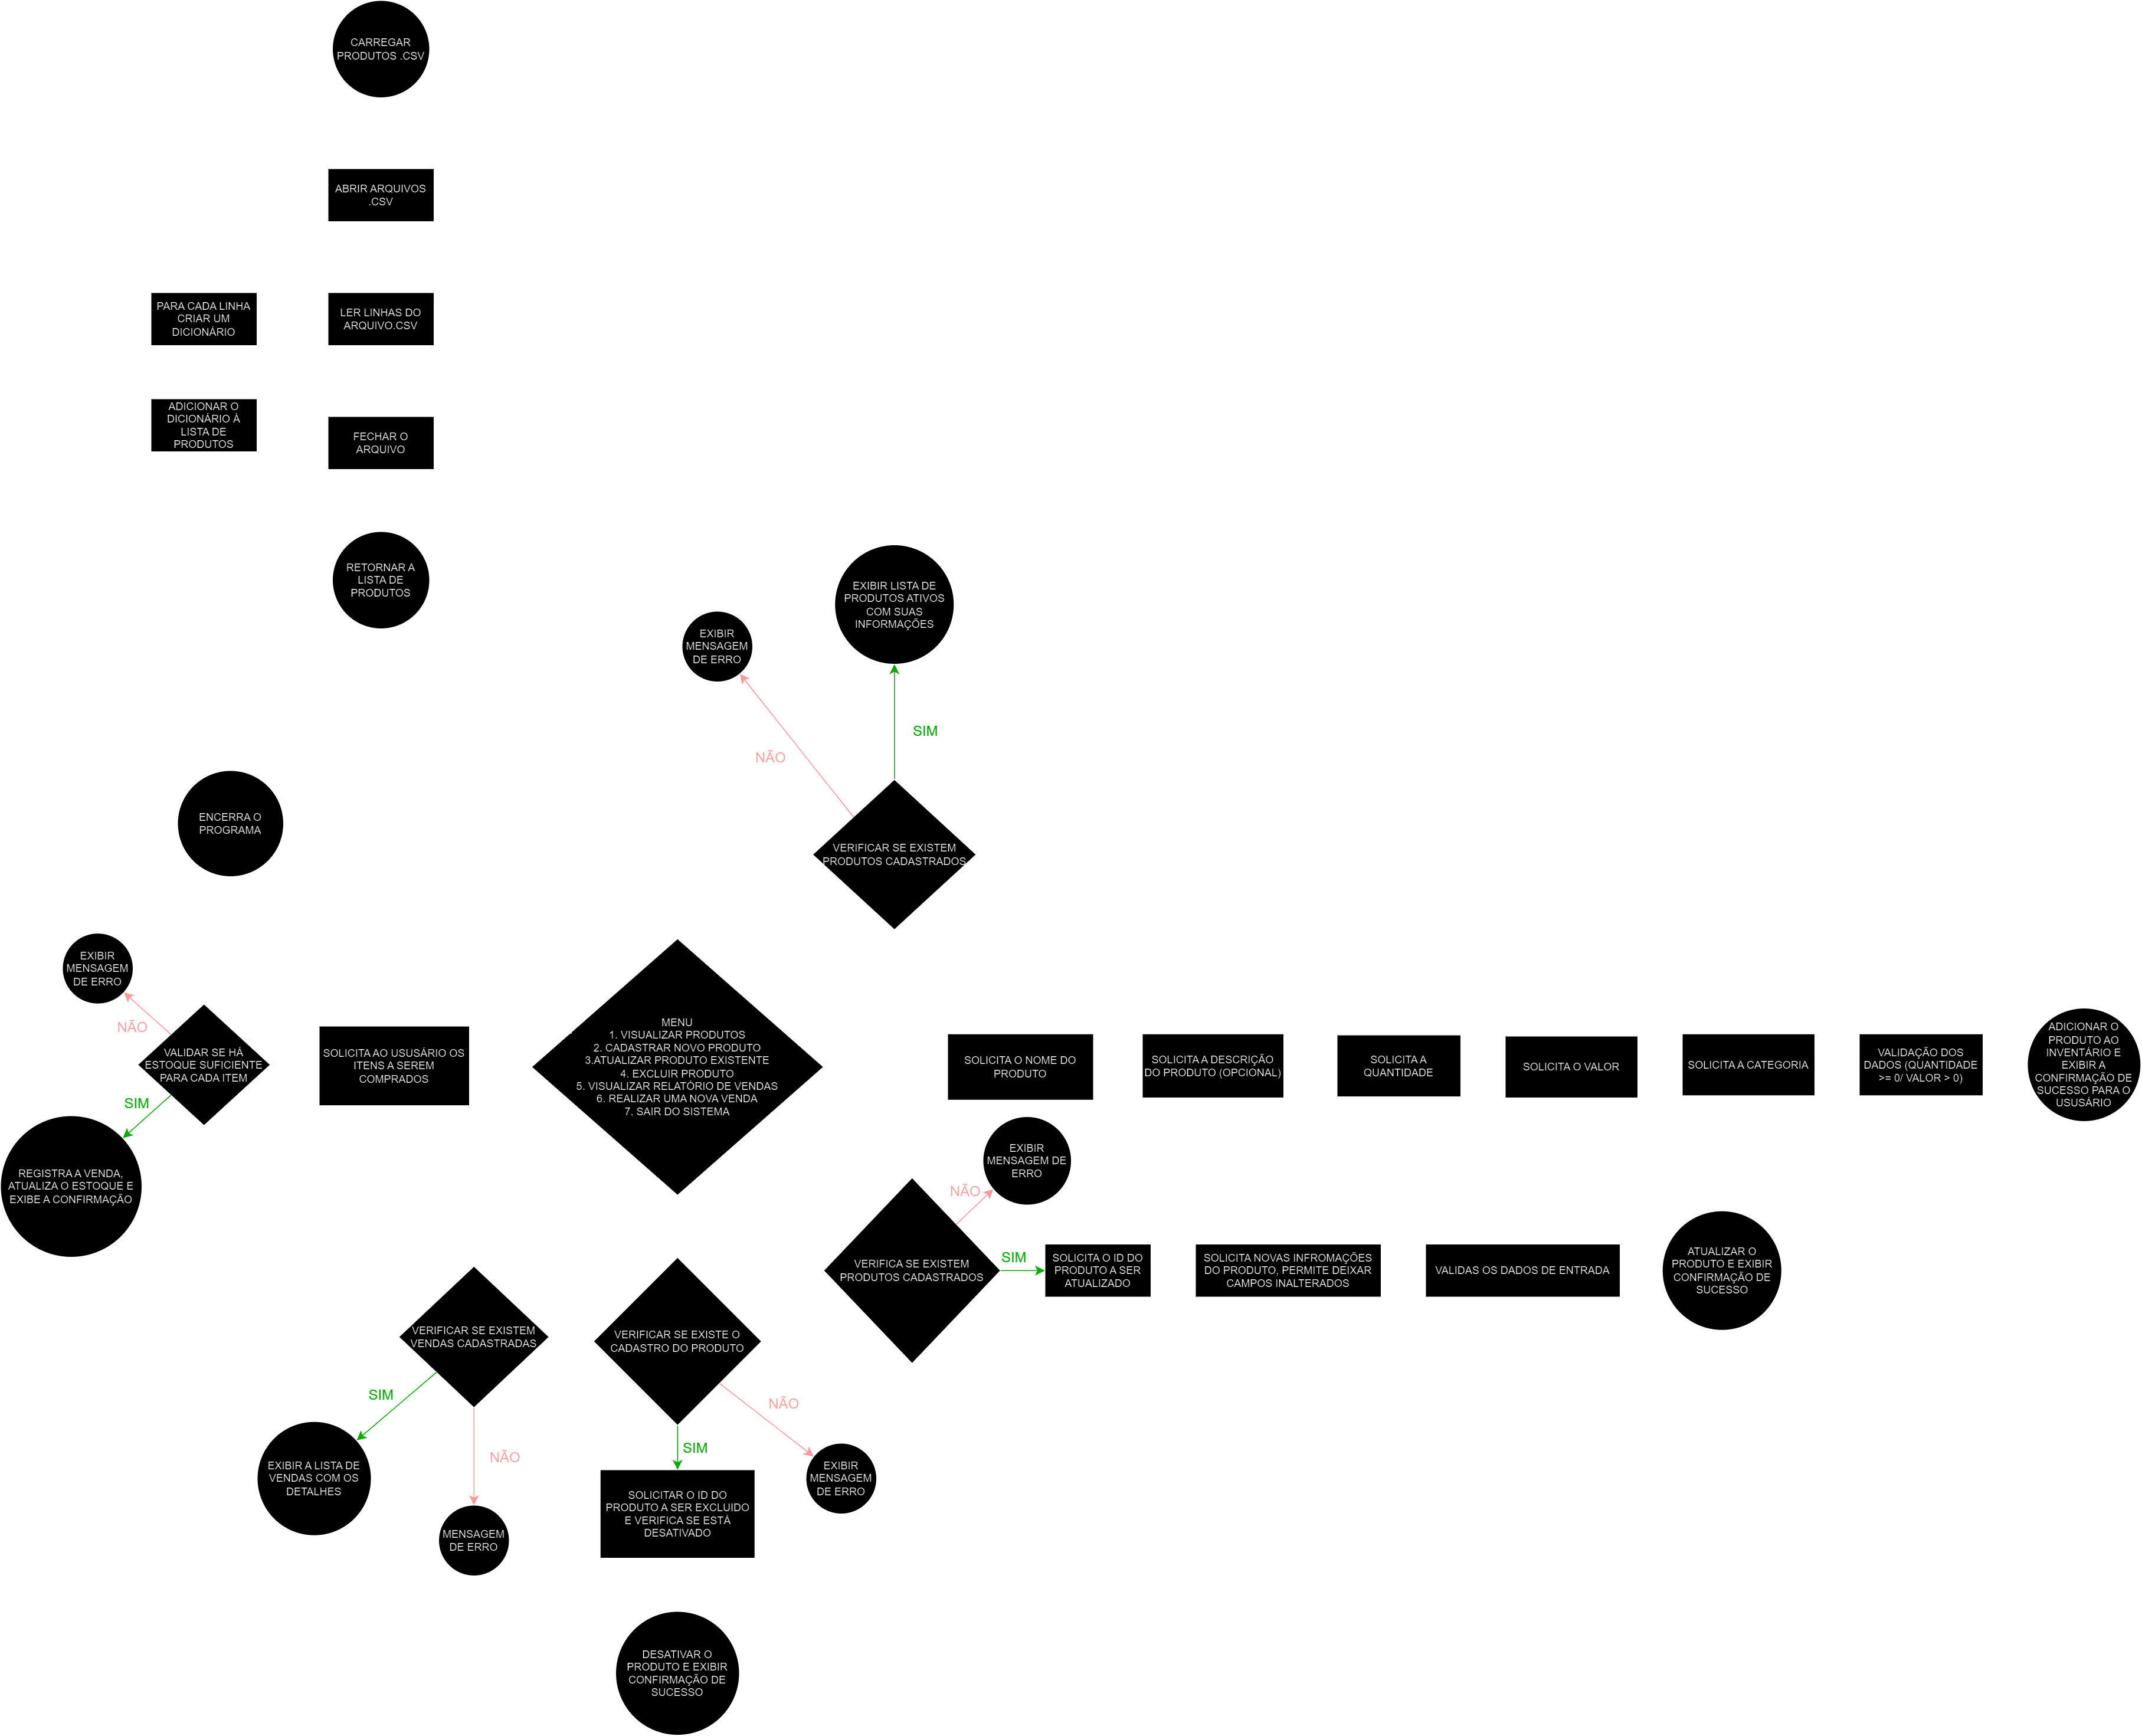

## Funcionalidades do sistema <a id='funcionalidades'></a>

### Interface com o usuário <a id='interface'></a>

#### Função de Interação com o Usuário

```python
user_interface(comando, path_produtos, path_vendas)
```
- **Descrição:** Permite que o usuário interaja com um sistema de gerenciamento de inventário. Oferece as opções de visualizar, cadastrar, atualizar e excluir produtos, visualizar relatório de vendas e efetuá-las. Carrega e salva informações de produtos e vendas em arquivos CSV. Não retorna valores, apenas executa comandos e manipula arquivos de produtos e vendas.
- **Parâmetros:**
  - `comando` (int): Um número inteiro que indica a opção desejada pelo usuário. Os valores e opções são:
    - `1`: Visualizar produtos.
    - `2`: Cadastrar um novo produto.
    - `3`: Atualizar um produto existente.
    - `4`: Excluir um produto.
    - `5`: Visualizar  o relatório de vendas.
    - `6`: Efetuar uma venda.
  - `path_produtos` (str): Caminho para o arquivo CSV que contém a lista de produtos.
  - `path_vendas` (str): Caminho para o arquivo CSV que contém a lista de vendas.
- **Funcionamento:**
  1. **Carregamento de Dados:**
     - Carrega lista de produtos a partir do arquivo CSV especificado em `path_produtos`.
     - Carrega lista de vendas a partir do arquivo CSV especificado em `path_vendas`.
  2. **Execução de Comandos:**
     - **Comando 1:** Visualiza a lista de produtos ativos usando a função `lista_produtos_ativos`.
     - **Comando 2:** Cadastra um novo produto com os dados recebidos do usuário. O produto é adicionado a lista com um identificador único (ID incrementado).
     - **Comando 3:** Atualiza um produto existente com base no ID do produto e nas informações que o usuário desejar alterar.
     - **Comando 4:** Exclui um produto da lista com base no ID fornecido pelo usuário. O produto fica inativado no sistema.
     - **Comando 5:** Visualiza o relatório de vendas utilizando a função `lista_vendas`.
     - **Comando 6:** Inicia uma nova venda.
  3. **Persistência dos Dados:**
     - Após a execução de comandos, a função de interface do usuário salva as listas atualizadas de produtos e vendas nos arquivos CSV especificados.
  4. **Funções de suporte a interface do usuário:**
     - `carrega_produtos_csv()`
     - `carrega_vendas_csv()`
     - `lista_produtos_ativos()`
     - `cadastra_produto()`
     - `atualiza_produto()`
     - `desativa_produto()`
     - `lista_vendas()`
     - `inicia_venda()`
     - `persistir_produtos_csv()`
     - `persistir_vendas_csv()`
  5. **Observações:**
     - Os tratamentos de exceção são feitos dentro das funções de suporte.
     

#### Função de Gerenciamento de Fluxo de Execução

```python
main()
```
- **Descrição:** Inicia e gerencia o fluxo de execução do sistema de gerenciamento. É o ponto de partida principal do programa.
- **Funcionamento:**
  1. Obtém o diretório do trabalho e cria um caminho para uma pasta chamada 'dados' dentro do diretório.
  2. Verifica se a pasta 'dados' já existe. Caso contrário, ela é criada.
  3. Define caminho para dois arquivos CSV, 'produtos.csv' e 'vendas.csv', que vão estar localizados na pasta 'dados'.
  4. Entra em loop exibindo um menu e solicitando ao usuário que escolha uma opção.
  5. Dependendo da opção escolhida pelo usuário´, a função `user_interface` é chamada com os caminhos dos arquivos como argumentos. Se a função retorna `True` o loop é interrompido e exibe uma mensagem de agtradecimento ao usuário.
  6. O programa continua em execução até que o usuário decida finalizar. O programa exibe uma mensagem de agradecimento e encerra.
- **Observações:**
  - O menu e as opções disponíveis são gerenciadas pela função principal `menu` e a entrada do usuário é processada pela função auxiliar `input_numero()`.
  - A função `os.makedirs` usa o parâmetro `exist_ok=True` para evitar erros se a pasta 'dados' já existir.

### Documentação técnica das funções <a id='documentacaotecnica'></a>

#### Função de Cadastro de Produtos

```python
cadastra_produto(produtos, produto_id, produto_nome, produto_descricao, produto_quantidade, produto_valor, produto_categoria)
```

- **Descrição:** Permite o registro de novos produtos no sistema de gerenciamento e captura informações de nome, categoria, preço, quantidade em estoque e descrição opcional do produto.
- **Atributos:**
    - Recebe os dados de entrada do usuário.
    - Armazena os dados em uma estrutura de dicionário onde cada produto recebe um identificador único.
    - Classifica os produtos como ativos no registro.
    - Retorna ao usuário confirmação de registro do novo produto.
- **Parâmetros**
    - `produtos` (list): A lista de produtos onde o novo produto será adicionado. Cada produto na lista é representado por um dicionário.
    - `produto_id` (int): O identificador único do produto.
    - `produto_nome` (str): O nome do produto.
    - `produto_descricao` (str): A descrição do produto.
    - `produto_quantidade` (int): A quantidade disponível do produto em estoque.
    - `produto_valor` (float): O preço do produto.
    - `produto_categoria` (str): A categoria do produto.

#### Função de Atualização de Produtos
```python
atualiza_produto(produtos, produto_id, **produto_atualizacao)
```
- **Descrição:** Atualiza informações de produtos cadastrados no sistema.
- **Atributos:**
    - Recebe o identificador único do produto cadastrado.
    - Recebe o tipo de informação que o usuário deseja atualizar (nome, categoria, preço, estoque ou descrição).
    - Armazena a informação atualizada do produto.
    - Retorna ao usuário mensagem de atualização cadastral e aviso caso o produto não tenha sido encontrado.
- **Parâmetros:**
    - `produtos` (list): A lista de produtos, onde cada produto é representado por um dicionário. O dicionário deve conter pelo menos a chave 'id'.
    - `produto_id` (int): O identificador único do produto a ser atualizado. A função procura o produto com esse ID na lista de produtos.
    - `**produto_atualizacao`: Um número variável de argumentos de palavra-chave que representam as atualizações a serem feitas. As chaves devem corresponder às chaves existentes no dicionário do produto e podem incluir:
        - 'nome' (str): O novo nome do produto.
        - 'descricao' (str): A nova descrição do produto.
        - 'quantidade' (int): A nova quantidade disponível do produto.
        - 'valor' (float): O novo valor do produto. Se fornecido como string, será convertido para float.
        - 'categoria' (str): A nova categoria do produto.
        - 'ativo' (bool): Indica se o produto está ativo ou não. Se a chave 'ativo' for fornecida como False, o produto será marcado como inativo.

#### Função de Listagem de Produtos Ativos
```python
lista_produtos_ativos(produtos)
```
- **Descrição:** Lista os produtos que estão ativos para serem vendidos, manipulados, atualizados e incluídos em relatórios pelo gerenciador do sistema.
- **Atributos:**
    - Filtra os produtos com a flag de ativo no sistema.
    - Retorna o identificador e as informações dos produtos ativos.
- **Parâmetro:**
  - `produtos` (list) : Uma lista de dicionários onde cada dicionário representa um produto registrado e deve conter pelo menos a chave 'ativo'.

#### Função de Inativação (Exclusão) de Produtos
```python
desativa_produto(produto_id, produtos)
```
- **Descrição:** Desativa o produto do sistema adicionando a flag de inativo.
- **Atributos:**
    - Recebe o identificador do produto e a lista de produtos do usuário.
    - Retorna mensagem de que o produto foi excluído do sistema ou que não foi encontrado no sistema.
- **Parâmetros:**
    - `produto_id` (int): O identificador único do produto a ser desativado. A função busca o produto na lista com este ID.
    - `produtos` (list): Uma lista de dicionários onde cada dicionário representa um produto. Cada produto deve conter pelo menos as chaves 'id' e 'ativo'. O valor da chave 'ativo' indica se o produto está ativo (True) ou inativo (False).

#### Função de Geração de Recibos de Venda
```python
gera_recibo(venda)
```
- **Descrição:** Gera um recibo de venda em formato CSV e o salva em um arquivo.
- **Atributos:**
  - Recebe um dicionário com os dados da venda.
  - Cria um arquivo CSV contendo os detalhes de uma venda, incluindo o ID da venda, a lista de produtos, o valor total e a data e hora da venda.
  - Salva o arquivo em uma pasta chamada 'recibos' no diretório de trabalho atual. Se a pasta não existir, ela será criada.
- **Parâmetros:**
    - `venda` (dict): Um dicionário contendo as informações da venda. Deve incluir as seguintes chaves:
        - 'id' (int): O identificador único da venda.
        - 'produtos' (list): Lista de produtos envolvidos na venda, onde cada produto é representado como um dicionário.
        - 'valor_total' (float): O valor total da venda.
        - 'data_hora' (str): A data e hora em que a venda foi realizada, no formato 'YYYY-MM-DD HH:MM:SS'. 

#### Função de Atualização de Estoque
```python
atualiza_estoque(produtos, produtos_venda)
```
- **Descrição:** Atualiza o estoque de produtos, carregado e inicializado no começo do programa.
- **Atributos:**
  -  Procura o produto correspondente para cada produto na lista de vendas.
  -  Verifica se a quantidade disponível para o produto encontrado é suficiente para a quantidade vendida.
  -  Reduz a quantidade vendida do estoque do produto. 
- **Parâmetros:**
  - `produtos` (list of dict): Lista de produtos, onde cada produto é representado como um dicionário com as chaves 'id' (identificador do produto) e 'quantidade' (estoque atual).
  - `produtos_venda` (list of dict): Lista de produtos vendidos, onde cada produto vendido é representado como um dicionário com as chaves 'id' (identificador do produto) e 'quantidade' (quantidade vendida).

#### Função de Finalização de Vendas
```python
finaliza_venda(produtos, vendas, *venda_produtos)
```
- **Descrição:** Finaliza uma venda, calcula o valor total, registra a venda e gera um recibo.
- **Atributos:**
   - Calcula um novo ID para a venda baseado na quantidade atual de vendas mais 1.
   - Obtém a data e hora atuais no formato 'YYYY-MM-DD HH:MM:SS'.
   - Calcula o valor total da venda com base no valor e na quantidade dos produtos fornecidos.
   - Cria um dicionário com as informações da venda e adiciona à lista de vendas.
   - Gera um recibo CSV para a venda utilizando a função `gera_recibo`.
   - Imprime uma mensagem de confirmação com o ID da venda e a data e hora.
- **Parâmetros:**
  - `produtos` (list): Uma lista de dicionários onde cada dicionário representa um produto disponível para venda. Cada produto deve conter, pelo menos, as chaves 'id', 'nome', 'valor', e 'quantidade' (para controle de estoque).
  - `vendas` (list): Uma lista onde cada item é um dicionário representando uma venda registrada. A função adicionará um novo dicionário de venda a esta lista.
  - `*venda_produtos`: Um número variável de argumentos, onde cada argumento é um dicionário representando um produto vendido na transação. Cada dicionário deve conter as chaves 'id', 'nome', 'valor', e 'quantidade'.

#### Função de Processamento de venda
```python
gera_venda(produtos, produtos_ativos, vendas, *produtos_vendas)
```
- **Descrição:** Gera uma venda com base nos produtos vendidos e atualiza a lista de vendas.
- **Atributos:**
  - Cria uma lista de produtos vendidos com base nas informações de 'produto_vendas'.
  - Busca informações adicionais na lista de 'produtos_ativos'.
  - Registra a venda e modifica a lista de vendas.
- **Parâmetros:**
  - `produtos` (list of dict): Lista de produtos, onde cada produto é representado como um dicionário. Esta lista é usada para a atualização posterior de vendas.
  -  `produtos_ativos` (list of dict): Lista de produtos disponíveis atualmente, onde cada produto é representado como um dicionário com as chaves 'id', 'nome','valor' e 'descricao'.
  -  `vendas` (list of dict): Lista de vendas, onde cada venda é representada como um dicionário. Esta lista é atualizada com a nova venda gerada.
  - `*produtos_vendas` (dict): Lista de produtos vendidos, onde cada produto vendido é representadocomo um dicionário com as chaves 'id' (identificador do produto) e'quantidade' (quantidade vendida). 

#### Função de Validação de Produto
```python
valida_produto(produtos_ativos, produto_id, produto_quantidade)
```
- **Descrição:** Valida e atualiza o esqoue de um produto com base no ID e na quantidade fornecidos.
- **Atributos:**
  - Verifica se o produto com o ID especificado existe na lista de produtos ativos.
  - Verifica se há quantidade suficiente em estoque para atender a quantidade desejada.
  - Atualiza estoque do produto se o estoque for suficiente e rertorna a mensagem 'True'.
  - Retorna a mensagem 'False' caso o produto não seja encontrado ou a quantidade em estoque é insuficiente.
- **Parâmetros:**
  - `produtos_ativos` (list of dict): Lista de produtos ativos, onde cada produto é representado como um dicionário com as chaves 'id' (identificador do produto) e 'quantidade' (estoque atual). O dicionário pode conter outras chaves como 'nome' (nome do produto), mas estas não são obrigatórias para a função funcionar.
  - `produto_id` (int): O identificador único do produto a ser validado e atualizado.
  - `produto_quantidade` (int): A quantidade desejada do produto.

#### Função de Inicialização do Processo de Venda
```python
inicia_venda(produtos, vendas)
```
- **Descrição:** Inicia uma venda permitindo adicionar produtos e suas quantidades demandadas.
- **Atributos:**
  - Recebe o ID e a quantidade de cada produto desejado, valida se o produto está ativo e se a quantidade em estoque é suficiente.
  - Adiciona produto a lista de vendas.
  - Verifica se o usuário deseja adicionar mais produtos.
  - Gera a venda e a adiciona ao registro de vendas quando o usuário indicar que não deseja mais adicionar produtos.
  - Retorna mensagem que a venda não pode ser iniciada caso o usuário adicione um produto inválido.
- **Parâmetros:**
  - `produtos` (list of dict): Lista de produtos disponíveis, onde cada produto é representado como um dicionário com informações como 'id', 'ativo' (se o produto está ativo) e outras propriedades como 'nome', 'valor', e 'quantidade'.
  - `vendas` (list of dict): Lista de vendas, onde cada venda é representada como um dicionário. 

#### Função de Elaboração de Relatório de Vendas
```python
lista_vendas(vendas)
```
- **Descrição:** Gera e exibe um relatório detalhado de todas as vendas registradas.
- **Atributos:**
  - Imprime no console relatório contendo informações sobre cada venda na lista de vendas.
  - Inclui no relatório informações como ID da venda, detalhes dos produtos vendidos, valor total da venda, data e hora em que a venda foi realizada.
  - Formata o relatório para facilitar a leitura e compreensão dos dados.
- **Parâmetros:**
  - `vendas` (list of dict): Lista de vendas, onde cada venda é representada como um dicionário contendo informações como:
      - 'id' (ID da venda)
      - 'produtos' (lista de produtos vendidos, onde cada produto é um dicionário com detalhes do produto)
      - 'valor_total' (valor total da venda, um número decimal)
      - 'data_hora' (data e hora em que a venda foi realizada, como uma string)

#### Função de Conversão para Padrão Numérico
```python
converte_numero(num)
```
- **Descrição:** Converte a representação de um número em string para um formato padrão (com ponto como separador decimal).
- **Atributos:**
  - Ajusta a string de um número para garantir que o ponto ('.') seja usado como separador decimal.
  - Substitui o ponto ('.') como decimal em strings com ponto ('.') no separador de milhar e vírgula (',') no separador decimal.
  - Substitui a vírgula (',') por ponto ('.') em string com seperador decimal.
- **Parâmetros**
  - `num` (str): A string representando o número a ser convertido. Pode conter vírgulas e pontos.

#### Função de Tratamento de Dados Numéricos

```python
input_numero(prompt, opcional=False, tipo: Type = int, valores_validos=None, tam_min=0, tam_max=9999999)
```
- **Descrição:** Solicita, valida a entrada do usuário e a converte para o tipo especificado.
- **Atributos:**
  - Mostra o 'prompt' para o usuário e recebe a entrada, validando de acordo com o tipo especificado, restrições de valores válidos, tamanho mínimo e máximo.
  - Retorna mensagem de erro caso a entrada não seja válida e solicita que o usuário digite uma entrada válida. 
- **Parâmetros:**
  - `prompt` (str): A mensagem a ser exibida para o usuário solicitando a entrada.
  - `opcional` (bool, opcional): Se `True`, permite que o usuário deixe o campo em branco. Se `False`, o campo é obrigatório.
  - `tipo` (Type, opcional): O tipo para o qual a entrada deve ser convertida (por exemplo, `int`, `float`). O padrão é `int`.
  - `valores_validos` (list of int, opcional): Lista de valores válidos que a entrada deve corresponder. Se `None`, qualquer valor é aceito.
  - `tam_min` (int, opcional): O valor mínimo de caracteres permitido. O padrão é 0.
  - `tam_max` (int, opcional): O valor máximo de caracteres permitido. O padrão é 9999999.

#### Função de Tratamento de Dados Textuais
```python
input_texto(prompt, opcional=False, valores_validos=None, tam_max=100)
```
- **Descrição:** Solicita e valida a entrada do usuário como uma string com opções para deixar o campo opcional e restringir por comprimito os valores válidos.
- **Atributos:**
  - Mostra o prompt para o usuário, recebe e valida a entrada do usuário.
  - Retorna mensagem de erro caso a entrada seja inválida e solicita que o usuário digite uma entrada válida.
- **Parâmetros**
  - `prompt` (str): A mensagem a ser exibida para o usuário solicitando a entrada.
  - `opcional` (bool, opcional): Se `True`, permite que o usuário deixe o campo em branco. Se `False`, o campo é obrigatório.
  - `valores_validos` (list of str, opcional): Lista de valores válidos que a entrada deve corresponder. Se `None`, qualquer valor é aceito.
  - `tam_max` (int, opcional): O comprimento máximo permitido para a entrada em caracteres. O padrão é 100.

#### Função de Carregamento dos Dados de Produto
```python
carrega_produtos_csv(path)
```
- **Descrição:** Carrega uma lista de produtos a partir de um arquivo CSV.
- **Atributos:**
  - Lê um arquivo CSV contendo informações sobre produtos e carrega esses dados em uma lista de dicionários.
  - Cada dicionário contém as chaves de informações de um produto, como 'id', 'nome', 'descricao', 'valor', 'ativo' e 'categoria'.
  - Retorna mensagem de erro caso o arquivo CSV não existir ou ocorrer um erro ao processar o arquivo ou os seus dados.
- **Parâmetros**
  - `path` (str): O caminho para o arquivo CSV que contém os dados dos produtos.

#### Função de Persistencia de Produtos
```python
persistir_produtos_csv(produtos, path)
```
- **Descrição:** Salva uma lista de produtos em um arquivo CSV. 
- **Atributos:**
  - Escreve uma lista de produtos em um arquivo no formato CSV.
  - Cada produto é representado por um dicionário com chaves correspondentes às colunas do arquivo CSV.
  - Retorna mensagem de erro caso o arquivo não possa ser acessado devido a permissões ou por erros inesperados. 
- **Parâmetros**
  - `produtos` (list of dict):  Lista de dicionários onde cada dicionário representa um produto com as seguintes chaves:
    - 'id': ID do produto (int)
    - 'nome': Nome do produto (str)
    - 'descricao': Descrição do produto (str)
    - 'quantidade': Quantidade em estoque (int)
    - 'valor': Valor do produto (float)
    - 'ativo': Indica se o produto está ativo (bool)
    - 'categoria': Categoria do produto (str)
  - `path` (str): O caminho para o arquivo CSV onde os produtos serão salvos.

#### Função de Carregamento de Vendas
```python
carrega_vendas_csv(path)
```
- **Descrição:** Carrega uma lista de vendas a partir de um CSV. 
- **Atributos:**
  - Lê um arquivo CSV contendo informações sobre vendas e carrega esses dados em uma lista de dicionários.
  - Cada dicionário representa uma venda e contém chaves como 'id', 'produtos', 'valor_total' e 'data_hora'.
  - Exibe mensagens de erro se o arquivo CSV não existir ou se ocorrer um erro ao processar o arquivo ou seus dados.
  - **Observações:**
    - O arquivo CSV deve ter as colunas 'id', 'produtos', 'valor_total' e 'data_hora'.
    - A coluna 'produtos' deve conter uma string JSON representando a lista de produtos vendidos.
    - Caso um erro seja encontrado ao processar uma linha específica do CSV, essa linha será ignorada e uma mensagem de erro será exibida.
- **Parâmetros**
  - `path` (str): O caminho para o arquivo CSV que contém os dados das vendas.

#### Função de Persistência de Vendas
```python
persistir_vendas_csv(vendas, path)
```
- **Descrição:** Salva uma lista de vendas em um arquivo CSV.
- **Atributos:**
  - Escreve uma lista de vendas em um arquivo CSV. Cada venda deve ser representada como um dicionário com chaves correspondentes aos nomes das colunas no arquivo CSV.
  - Converte a coluna 'produtos' de uma lista de dicionários para uma string JSON antes de escrever.
  - Exibe mensagens de erro se o arquivo não puder ser acessado ou se ocorrer um erro ao processar o arquivo ou seus dados.
- **Parâmetros**
  - `vendas` (list of dict): Lista de dicionários, onde cada dicionário representa uma venda com as seguintes chaves:
    - 'id': ID da venda (int)
    - 'produtos': Lista de produtos vendidos. Cada produto é representado como um dicionário
    - 'valor_total': Valor total da venda (float)
    - 'data_hora': Data e hora da venda (str)
  - `path` (str): O caminho para o arquivo CSV onde as vendas serão salvas.

### Classificação das funções <a id='classificacao'></a>

1. **Criação, leitura, atualização e exclusão (CRUD)**
- **Propósito:** Adiciona, recupera, visualiza, modifica e remove registros armazenados.
- **Funções:**
  - Cadastrar produtos -> `cadastra_produto()`
  - Atualizar produtos -> `atualiza_produto()`
  - Listar produtos ativos -> `lista_produtos_ativos()`
  - Inativar (excluir) produtos -> `desativa_produto()`

2. **Vendas**
- **Propósito:** Operacionaliza todo o processo de venda do sistema de gerenciamento.
- **Funções:**
  - Elaborar recibo de vendas -> `gera_recibo()`
  - Atualizar estoque -> `atualiza_estoque()`
  - Finalizar uma venda -> `finaliza_venda()`
  - Processar uma venda -> `gera_venda()`
  - Verificar a quantidade do produto em estoque -> `valida_produto()`
  - Iniciar o processo de venda -> `inicia_venda()`
  - Elaborar relatório de vendas -> `lista_vendas()`

3. **Suporte e Tratamento de Exceções**
- **Propósito:** Auxilia e garante o correto funcionamento do código evitando casos com o código repetitivo, tratando e visualizando possíveis erros (exceções).
- **Funções:**
  - Converter dados númericos no padrão numérico (com ponto em caso de números decimais)  -> `converte_numero()`
  - Retornar mensagens de erros em campos que devem receber dados numéricos -> `input_numero()`
  - Retornar mensagens de erros em campos que devem receber dados textuais -> `input_texto()`

4. **Armazenamento de dados e Elaboração de arquivos**
- **Propósito:** Garante a persistência dos dados do inventário e informações de vendas.
- **Funções:**
  - Abrir e ler um arquivo (do tipo CSV) existente com os dados dos produtos -> `carrega_produtos_csv()`
  - Armazenar os dados do inventário e as informações de venda em arquivo CSV -> `persistir_arquivos_csv()`
  - Abrir e ler um arquivo (do tipo CSV) existente com os dados de venda -> `carrega_vendas_csv()`
  - Grava os dados de vendas em um arquivo CSV especificado pelo caminho fornecido -> `persistir_vendas_csv()`
 
5. **Interação e gerenciamento do sistema**
- **Propósito:** Permite a interação com o usuário e o gerenciamento do inventário de produtos.
- **Funções:**
  - Oferecer ao usuário opções de gerenciamento do sistema -> `user_interface()`
  - Assegurar o fluxo de execução e gerenciamento do sistema -> `main()`

### Decisões de design <a id='decisoes'></a>

* Decidimos criar mais funções do que o requisitado para a elaboração do sistema para garantir a mudalaridade, facilitar a manipulação pelo usuário e assegurar que os módulos (funções) podem ser atualizados e ajustados de forma independente no sistema. 
* Diferentemente da ação de excluir decidimos criar a função de inativação do produto no sistema a partir de um "selo" de produto ativo (chave 'ativo'). Isso garante que a informação sobre o inventário seja passada com maior controle e precisão não apenas sobre os produtos que estão disponíveis como aqueles que estiveram.

### Tecnologias utilizadas <a id='tecnologias'></a>

* Google Colab
* Jupyter Notebook
* Estruturas de programação:
  * Tuplas
  * Dicionários
  * Compreensão de listas e funções geradoras
  * Parâmetros e Retornos de Funções
  * Conceitos de Programação Funcional
  * Tratamento de exceção
  * Manipulação de Arquivos 

## Manual de Uso do Sistema <a id='manualdeuso'></a>

### Loja Virtual <a id='lojavirtual'></a>

A loja virtual é um home center, uma loja de varejo especializada em produtos de construção, reforma e manutenção de residências e estabelecimento comerciais. O home center contém os seguintes produtos a serem cadastrados.

| nome                  | descricao                                                        | quantidade | valor  | ativo | categoria   |
|-----------------------|------------------------------------------------------------------|------------|--------|-------|-------------|
| Furadeira Elétrica    | Furadeira elétrica com função de impacto e velocidade variável. | 25         | 299.99 | True  | Ferramentas |
| Pincel de Cabelo      | Pincel de cabelo profissional para pintura.                      | 100        | 15.99  | True  | Pintura     |
| Lâmpada LED           | Lâmpada LED de 12W com vida útil de 25.000 horas.                | 50         | 12.49  | True  | Iluminação  |
| Serra Circular        | Serra circular com disco de 7.1/4" para cortes precisos.         | 15         | 459.99 | True  | Ferramentas |
| Móvel de Escritório   | Móvel de escritório em madeira com gavetas e portas.             | 10         | 799.90 | True  | Móveis      |
| Escada Multifuncional | Escada multifuncional com 4 posições ajustáveis.                 | 30         | 199.99 | True  | Segurança   |
| Tinta Acrílica        | Tinta acrílica de 1 litro em diversas cores.                     | 80         | 25.00  | True  | Pintura     |
| Ventilador de Teto    | Ventilador de teto com controle remoto e 3 velocidades.           | 20         | 349.99 | True  | Ventilação  |
| Conjunto de Chaves    | Conjunto de chaves de boca e estrela em aço cromado.             | 60         | 89.90  | True  | Ferramentas |
| Armário de Cozinha    | Armário de cozinha com prateleiras e portas de vidro.            | 12         | 649.00 | True  | Móveis      |
| Kit de Primeiros Socorros | Kit completo de primeiros socorros com itens essenciais para emergências. | 40         | 89.99  | True  | Segurança   |
| Detector de Fumaça    | Detector de fumaça com alarme sonoro e indicador de bateria fraca. | 25         | 59.90  | True  | Segurança   |
| Câmera de Segurança   | Câmera de segurança com resolução HD e visão noturna.             | 18         | 349.90 | True  | Segurança   |
| Sofá Retrátil         | Sofá retrátil com chaise longue e estofado de alta qualidade.    | 8          | 1.299,00 | True | Móveis      |
| Parafusadeira Compacta | Parafusadeira compacta com bateria de longa duração e carregador. | 45         | 159.90 | True | Ferramentas |


### Implementação do Sistema <a id='implementacao'></a>

**Exemplo Real**

"Um cliente deseja comprar três itens específicos de categorias diferentes. O estoque de um desses itens está baixo. Seu sistema deve identificar o problema, avisar o cliente sobre o estoque insuficiente, e sugerir alternativas (se houver). O sistema deve então processar a venda para os itens disponíveis, atualizar o estoque, e gerar um recibo detalhado em formato CSV."

**Observações**
* Para fins de demonstração, cadastramos no sistema apenas os produtos demandados pelo usuário.
* Deixamos a lista de produtos descritos na tabela acima para futuras simulações de cadastro, atualização, exclusão e visualização de produtos.

### Etapas de Implementação <a id='etapas'></a>

#### Etapa 1: Interagindo com a interface
* Abra o sistema em um ambiente de desenvolvimento python de sua preferência.
* Execute todas as funções (CRUD, Vendas, Suporte e Tratamento de Exceções, Armazenamento de dados e elaboração de arquivos).
* Execute as funções de interação e gerenciamento do sistema.
* A tela abaixo será exibida.

```python
Bem-vindo ao Sistema de Gerenciamento de Inventário!


Escolha uma das opções do menu abaixo:

-------------- PRODUTOS --------------
| 1. Visualizar produtos
| 2. Cadastrar novo produto
| 3. Atualizar produto existente
| 4. Excluir produto
--------------- VENDAS ---------------
| 5. Visualizar relatório de vendas
| 6. Realizar uma nova venda
--------------------------------------
| 7. Sair do sistema
--------------------------------------

```

#### Etapa 2: Pedido de Compra de Produtos

* Assumindo que o cliente deseja comprar os seguintes produtos:

| id| nome                  | descricao                                                        | estoque | demanda do cliente | valor  | ativo | categoria |
|------|-----------------|------------------------------------------------------------------|---------|-------------|-------|-------|-----|
| 1| Móvel de Escritório   | Móvel de escritório em madeira com gavetas e portas.             | 10      | 10 | 799.90 | True  | Móveis      |
| 2|Conjunto de Chaves    | Conjunto de chaves de boca e estrela em aço cromado.             | 60      | 25 | 89.90  | True  | Ferramentas |
| 3|Câmera de Segurança   | Câmera de segurança com resolução HD e visão noturna.            | 18      | 20 | 349.90 | True  | Segurança   |

**Etapa 2: Verificação de Estoque e Processamento de Venda**

* Digite o número 6 para executar o comando de realizar uma nova venda.
* Digite os ids dos produtos e as quantidades desejadas.
* Responda 'Y' se quiser adicionar um produto e 'N' caso contrário.
* Verifique se aparece mensagem de estoque insuficiente.
* O estoque será atualizado após a venda do cliente.
* Verifique o recibo gerado em seu diretório na pasta 'dados'.

```python
Deseja adicionar outro produto? (Y/N)
```

```python
Bem-vindo ao Sistema de Gerenciamento de Inventário!


Escolha uma das opções do menu abaixo:

-------------- PRODUTOS --------------
| 1. Visualizar produtos
| 2. Cadastrar novo produto
| 3. Atualizar produto existente
| 4. Excluir produto
--------------- VENDAS ---------------
| 5. Visualizar relatório de vendas
| 6. Realizar uma nova venda
--------------------------------------
| 7. Sair do sistema
--------------------------------------


Digite a opção: 6
[AVISO]: Nenhuma venda encontrada no banco de dados. Por favor, faça novas compras no sistema.

Efetuando venda: 

Digite o id do produto: 1
Digite a quantidade do produto: 10
Deseja adicionar outro produto? (Y/N)Y
Digite o id do produto: 2
Digite a quantidade do produto: 25
Deseja adicionar outro produto? (Y/N)y
Digite o id do produto: 3
Digite a quantidade do produto: 20
Produto câmera de segurança com estoque insuficiente (18)
Deseja adicionar outro produto? (Y/N)n
Venda registrada com sucesso: 1 - 2024-08-20 17:56:09
```

* Digite a opção 1 para verificar os itens em estoque e suas respectivas quantidades.

```python
Digite a opção: 1
Visualizando produtos: 

ID do Produto id: 1
    nome: móvel de escritório
    descricao: móvel de escritório em madeira com gavetas e portas.
    quantidade: 0
    valor: 799.9
    categoria: móveis


ID do Produto id: 2
    nome: conjunto de chaves
    descricao: conjunto de chaves de boca e estrela em aço cromado.
    quantidade: 10
    valor: 89.9
    categoria: ferramentas


ID do Produto id: 3
    nome: câmera de segurança
    descricao: câmera de segurança com resolução hd e visão noturna.
    quantidade: 18
    valor: 349.9
    categoria: segurança

```

#### Etapa 3: Obtendo relatório de vendas
* Digite a opção para visualizar o seu relatório de vendas.

```python
Digite a opção: 5
Visualizando relatório de vendas: 

Relatório de vendas: 

ID da Venda: 1
    Produtos:
        ID do Produto id: 1
            nome: móvel de escritório
            descricao: móvel de escritório em madeira com gavetas e portas.
            quantidade: 10
            valor: 799.9
        ID do Produto id: 2
            nome: conjunto de chaves
            descricao: conjunto de chaves de boca e estrela em aço cromado.
            quantidade: 25
            valor: 89.9
    Valor Total: 10246.50
    Data e Hora da venda: 2024-08-20 17:56:09
```

## Próximos passos <a id=proximospassos></a>

* _Containerização_ do software em um ambiente que emula um sistema operacional utilizando o kernel do sistema pessoal para garantir a escalabilidade e a reprodutibilidade do programa.
* Integração com um banco de dados SQL.